# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
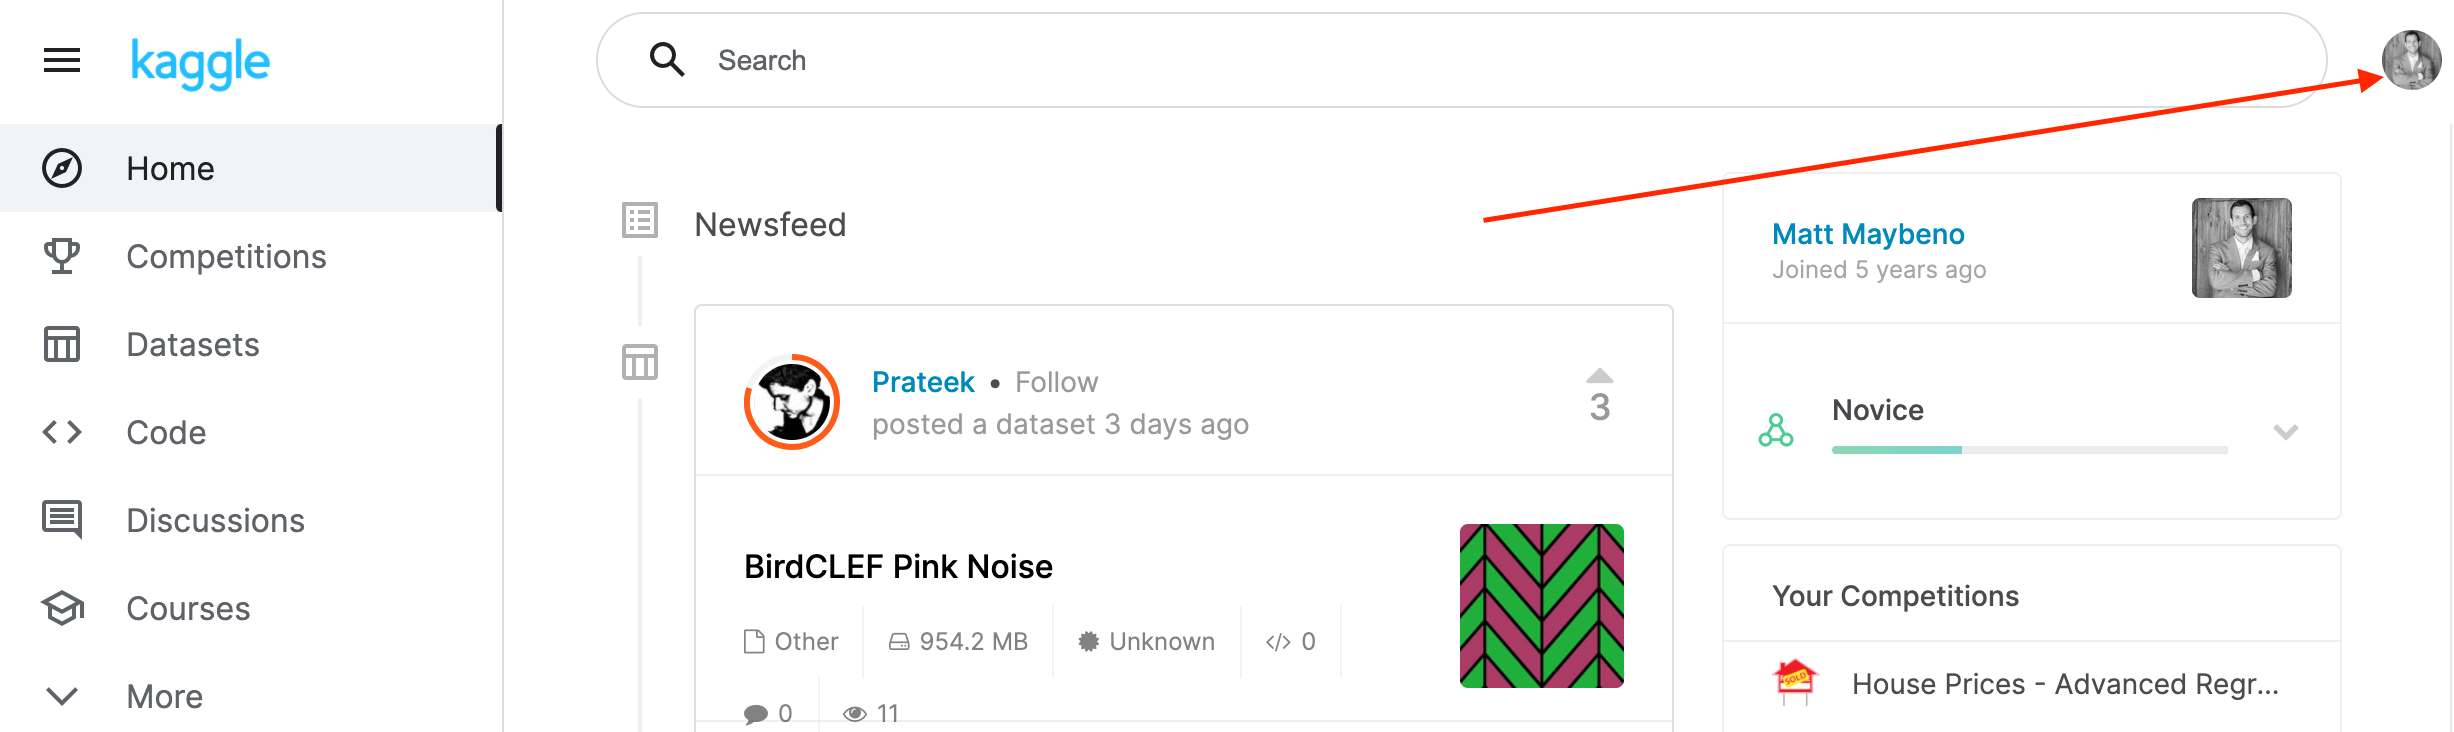
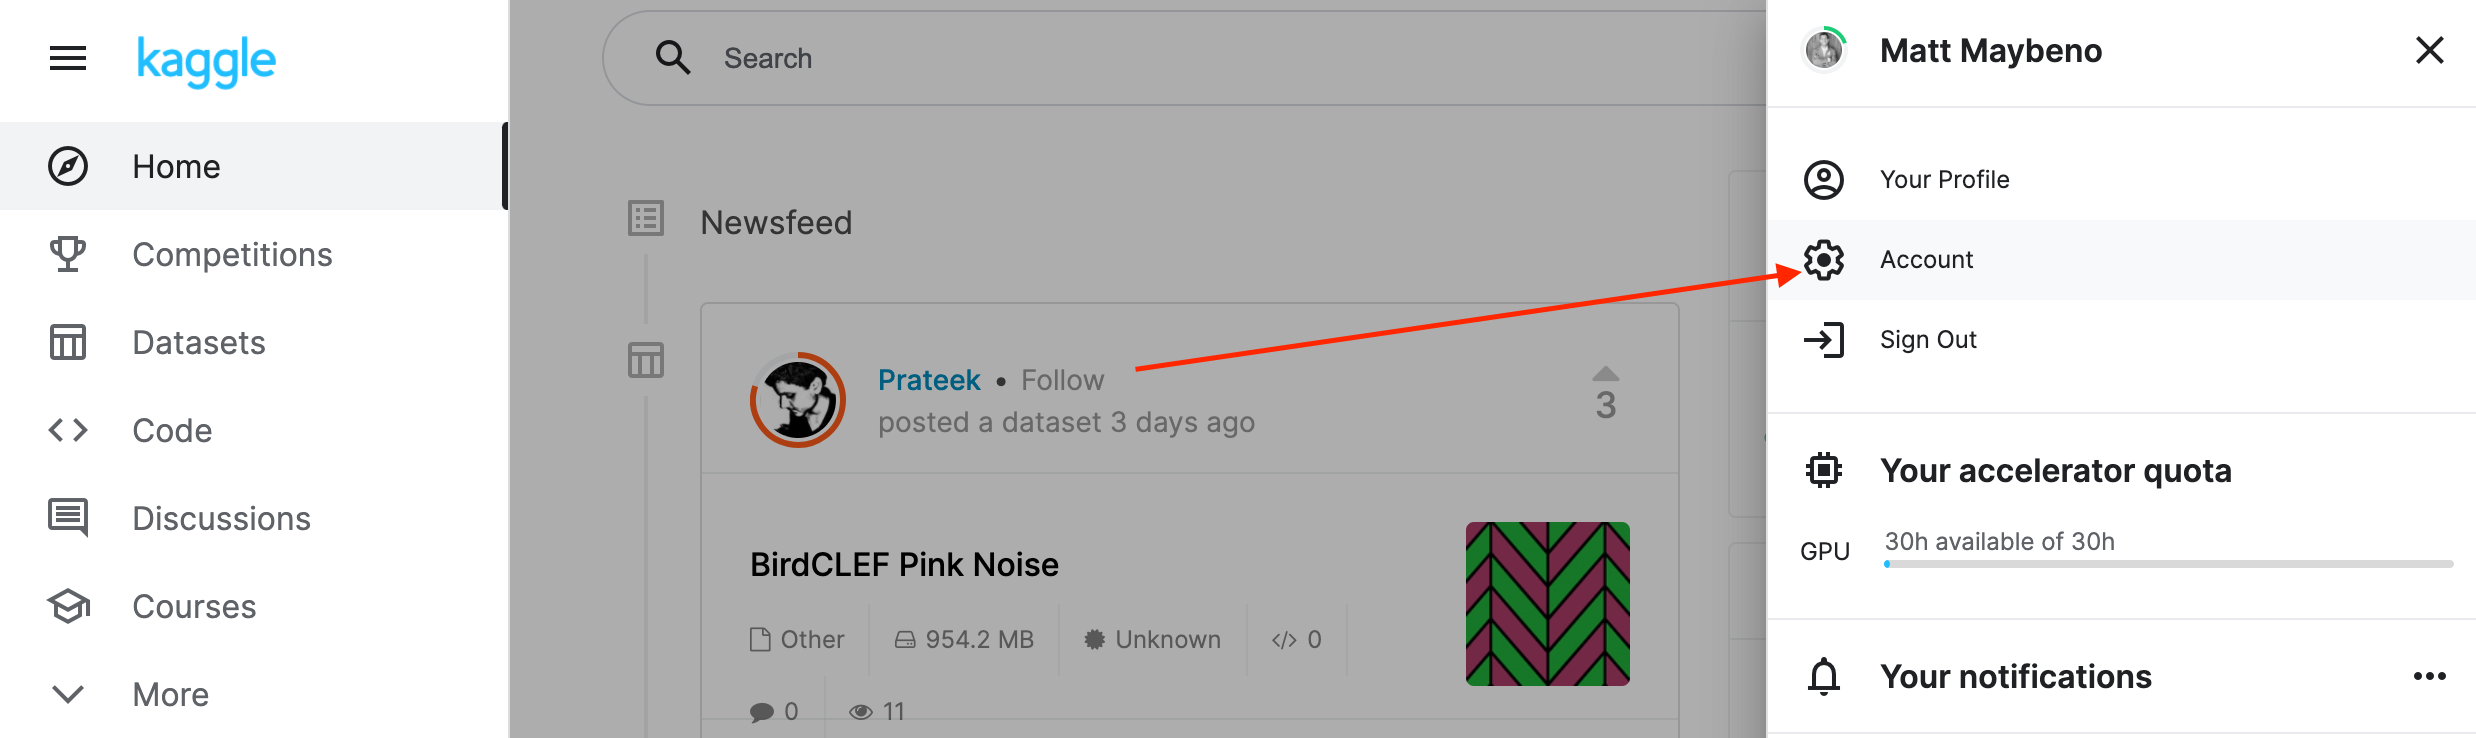
2. Scroll down to API and click Create New API Token.
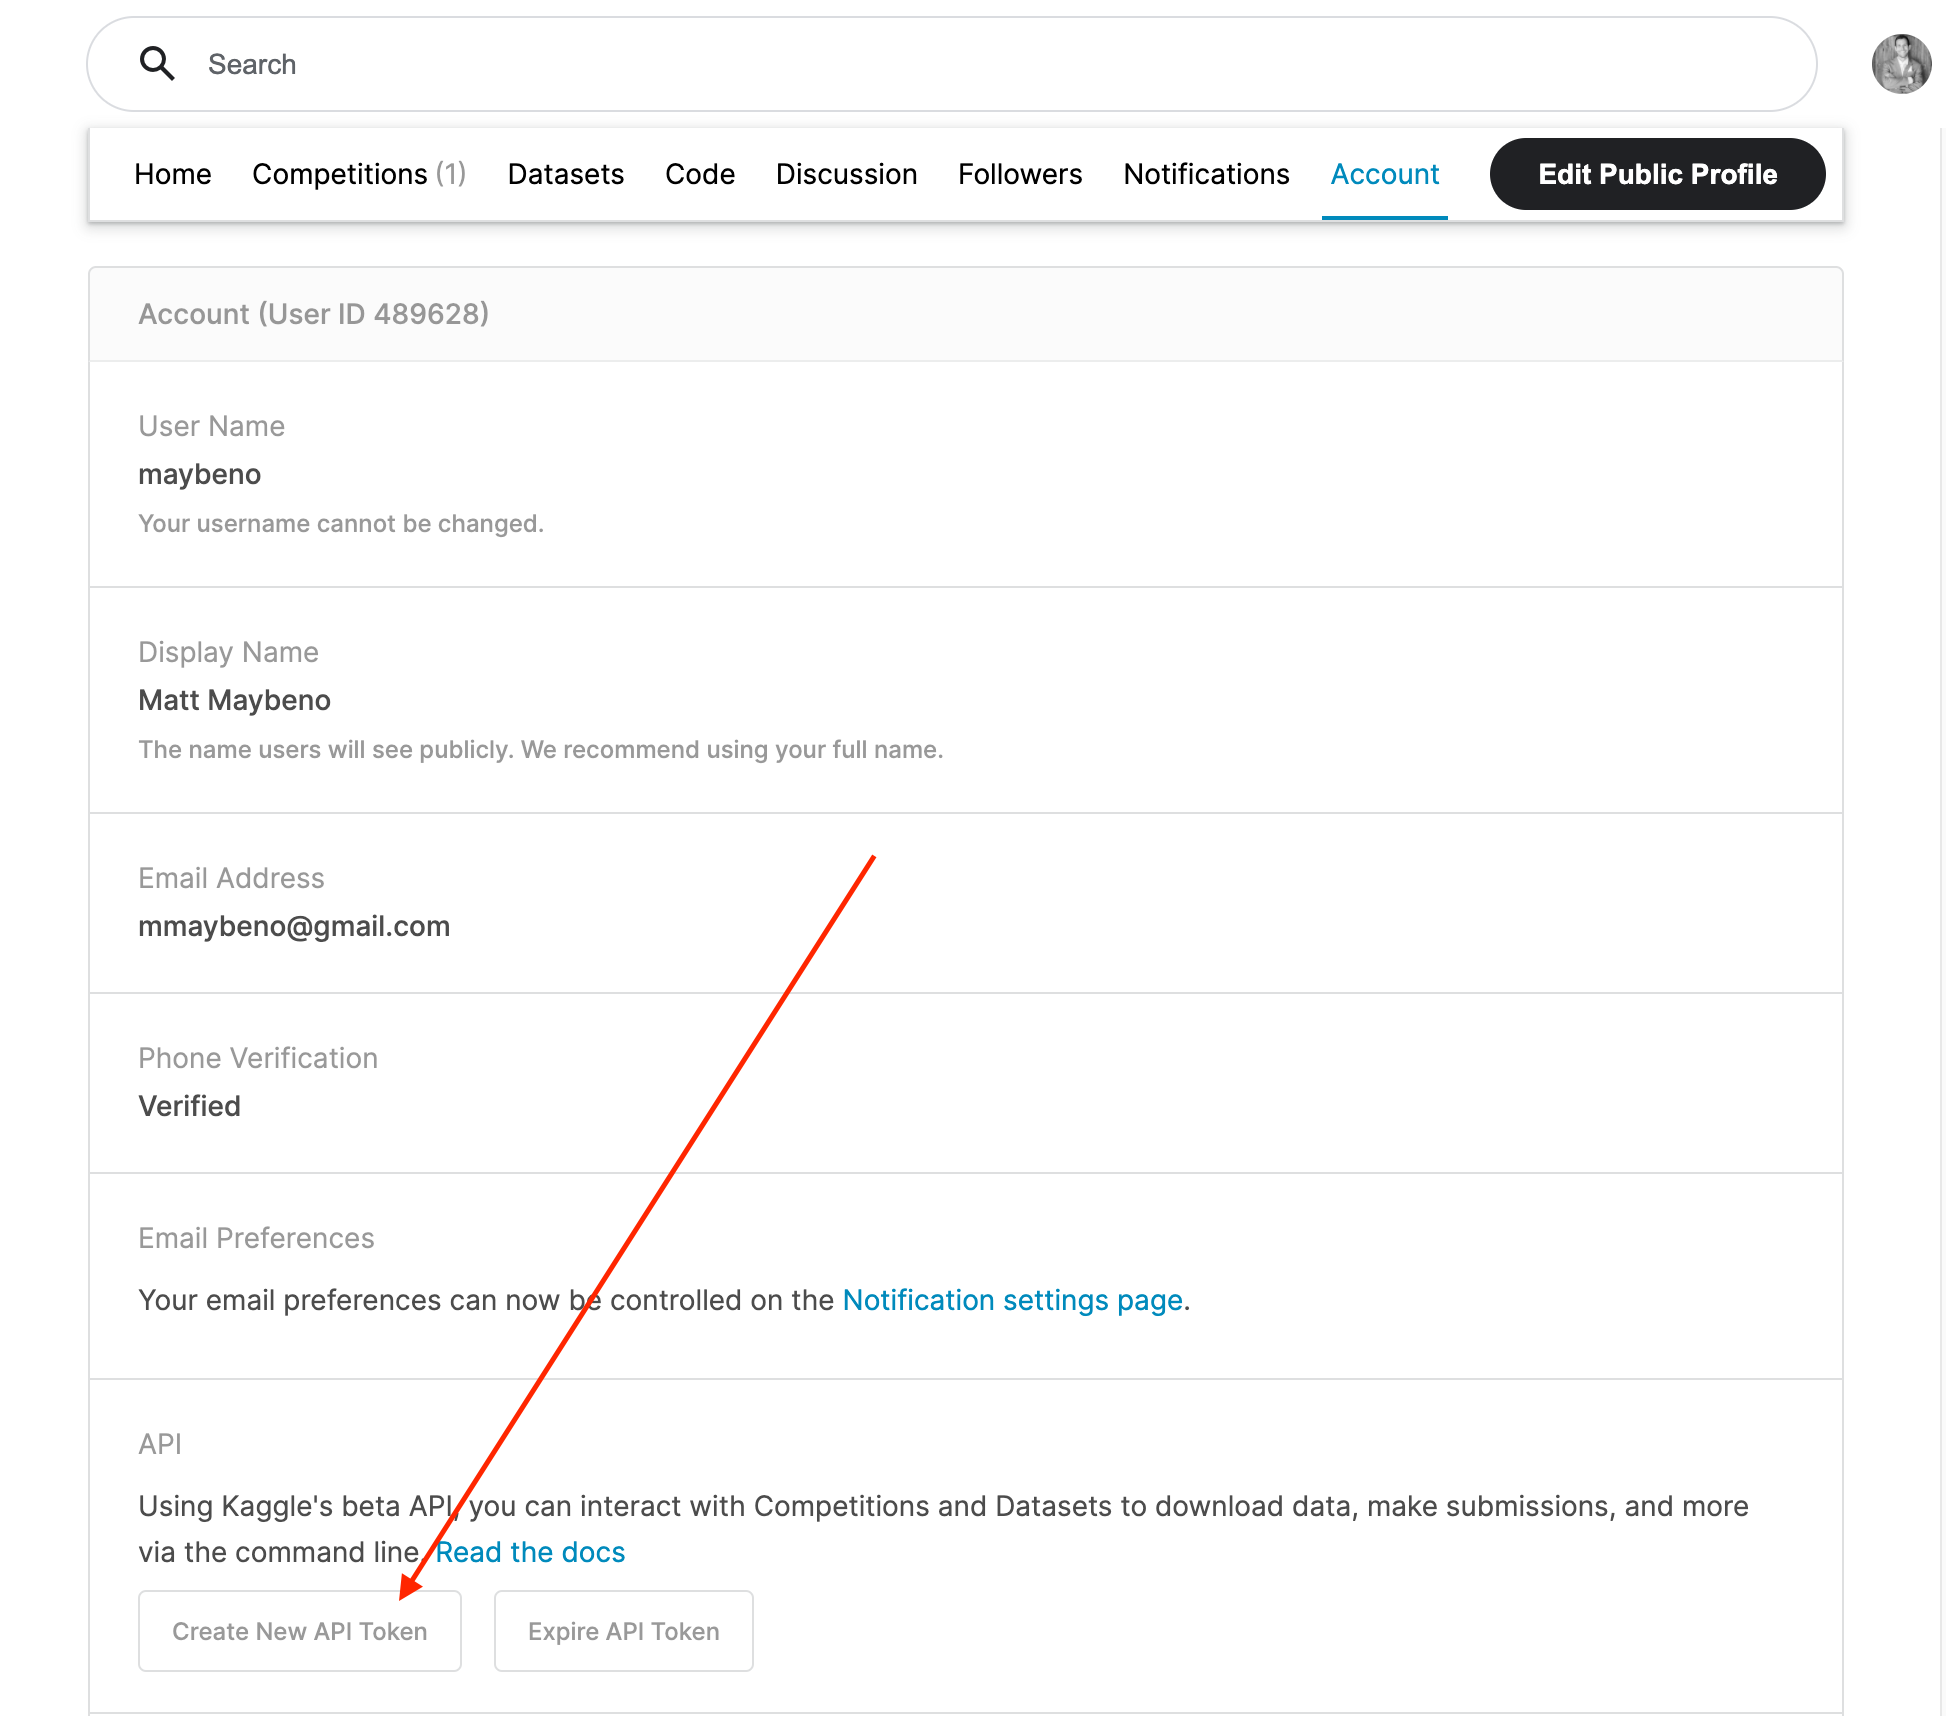
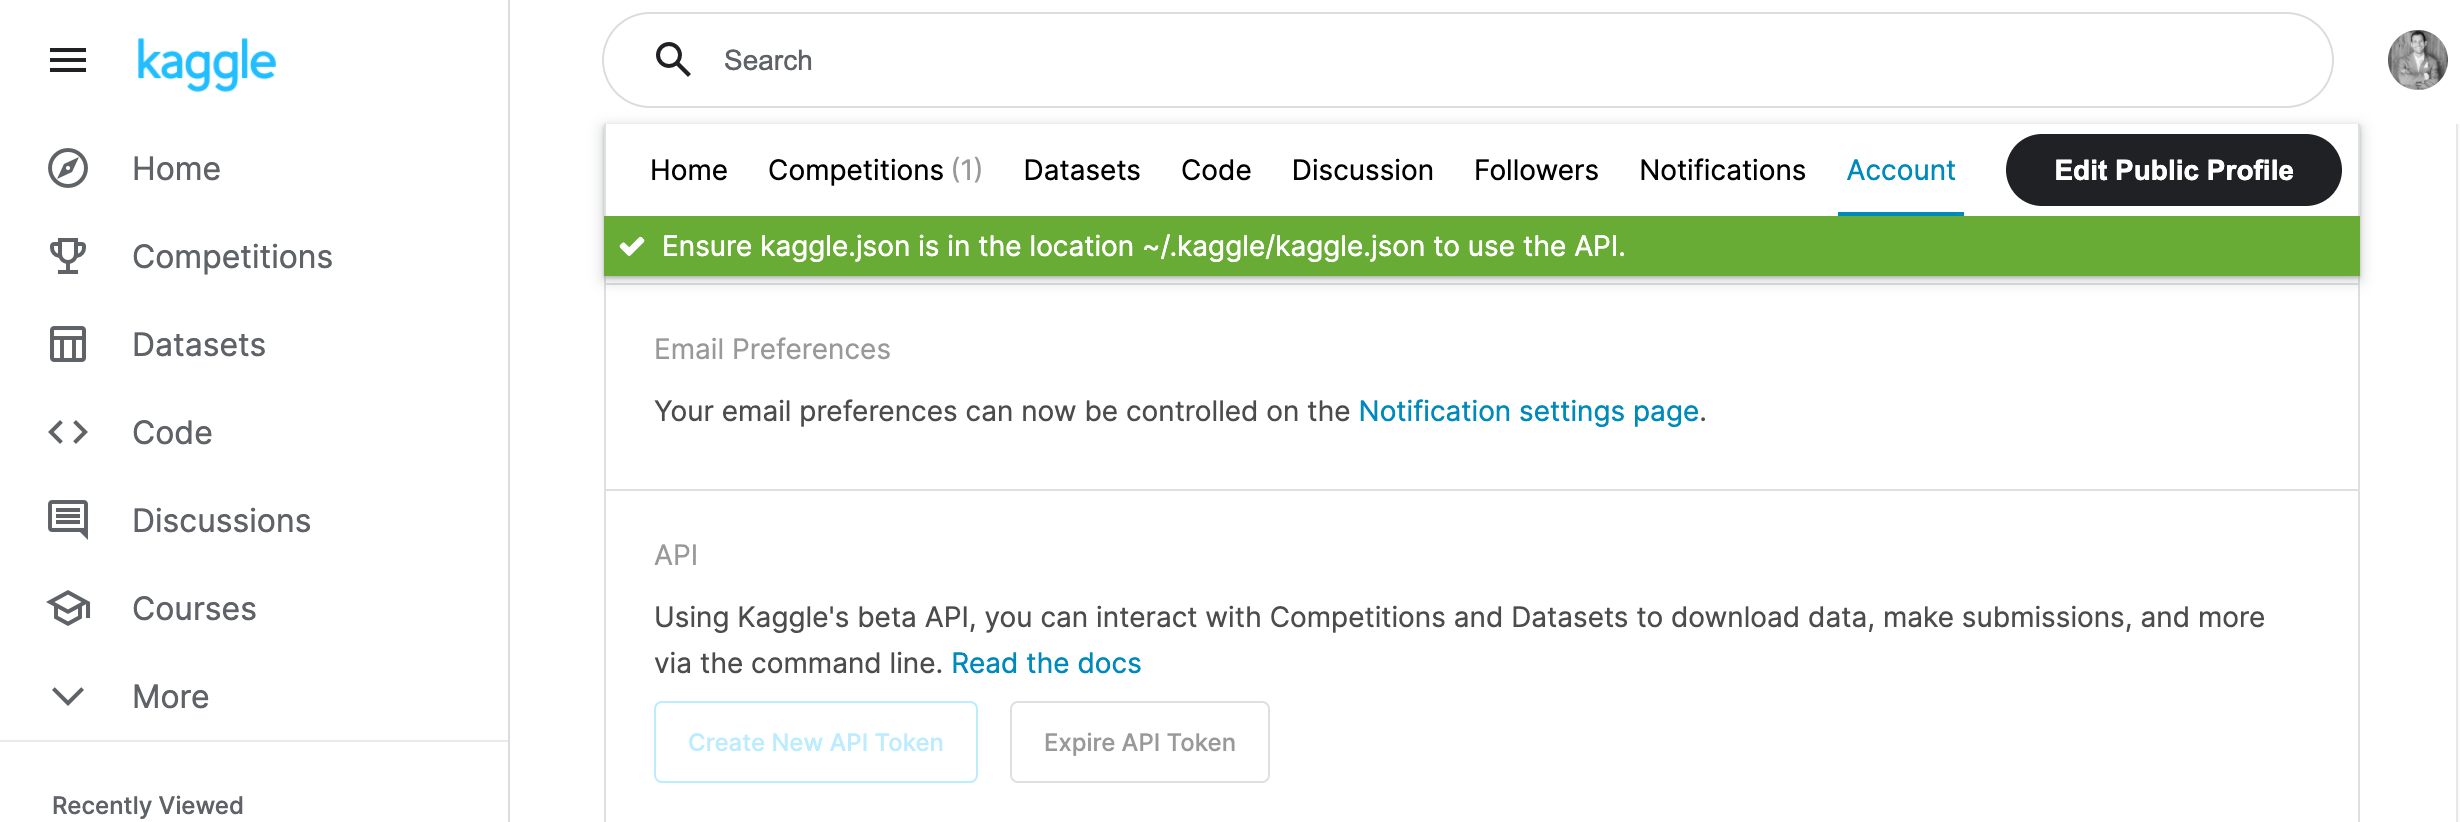
3. Open up `kaggle.json` and use the username and key.
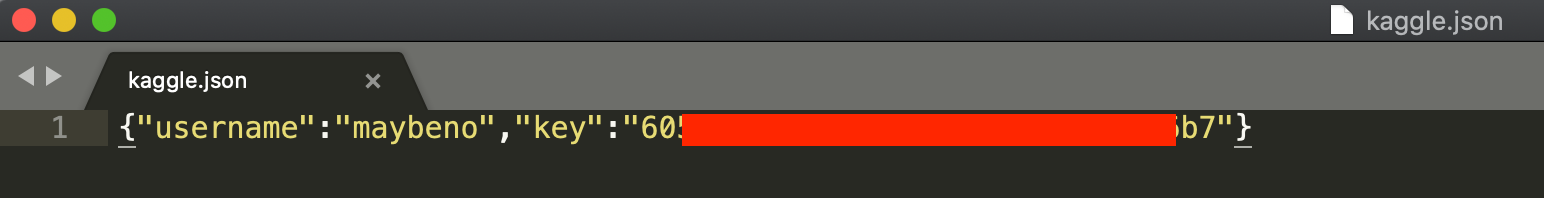

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/4f/ab/0bcfebdfc3bfa8554b2b2c97a555569c4c1ebc74ea288741ea8326c51906/setuptools-68.1.2-py3-none-any.whl.metadata
  Using cached setuptools-68.1.2-py3-none-any.whl.metadata (6.2 kB)
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/b8/8b/31273bf66016be6ad22bb7345c37ff350276cfd46e389a0c2ac5da9d9073/wheel-0.41.2-py3-none-any.whl.metadata
  Using cached wheel-0.41.2-py3-none-any.whl.metadata (2.2 kB)
Using cached setuptools-68.1.2-py3-none-any.whl (805 kB)
Using cached wheel-0.41.2-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.0.0
    Uninstalling setuptools-68.0.0:
      Successfully uninstalled setuptools-68.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p .kaggle
!touch .kaggle/kaggle.json
!chmod 600 .kaggle/kaggle.json

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
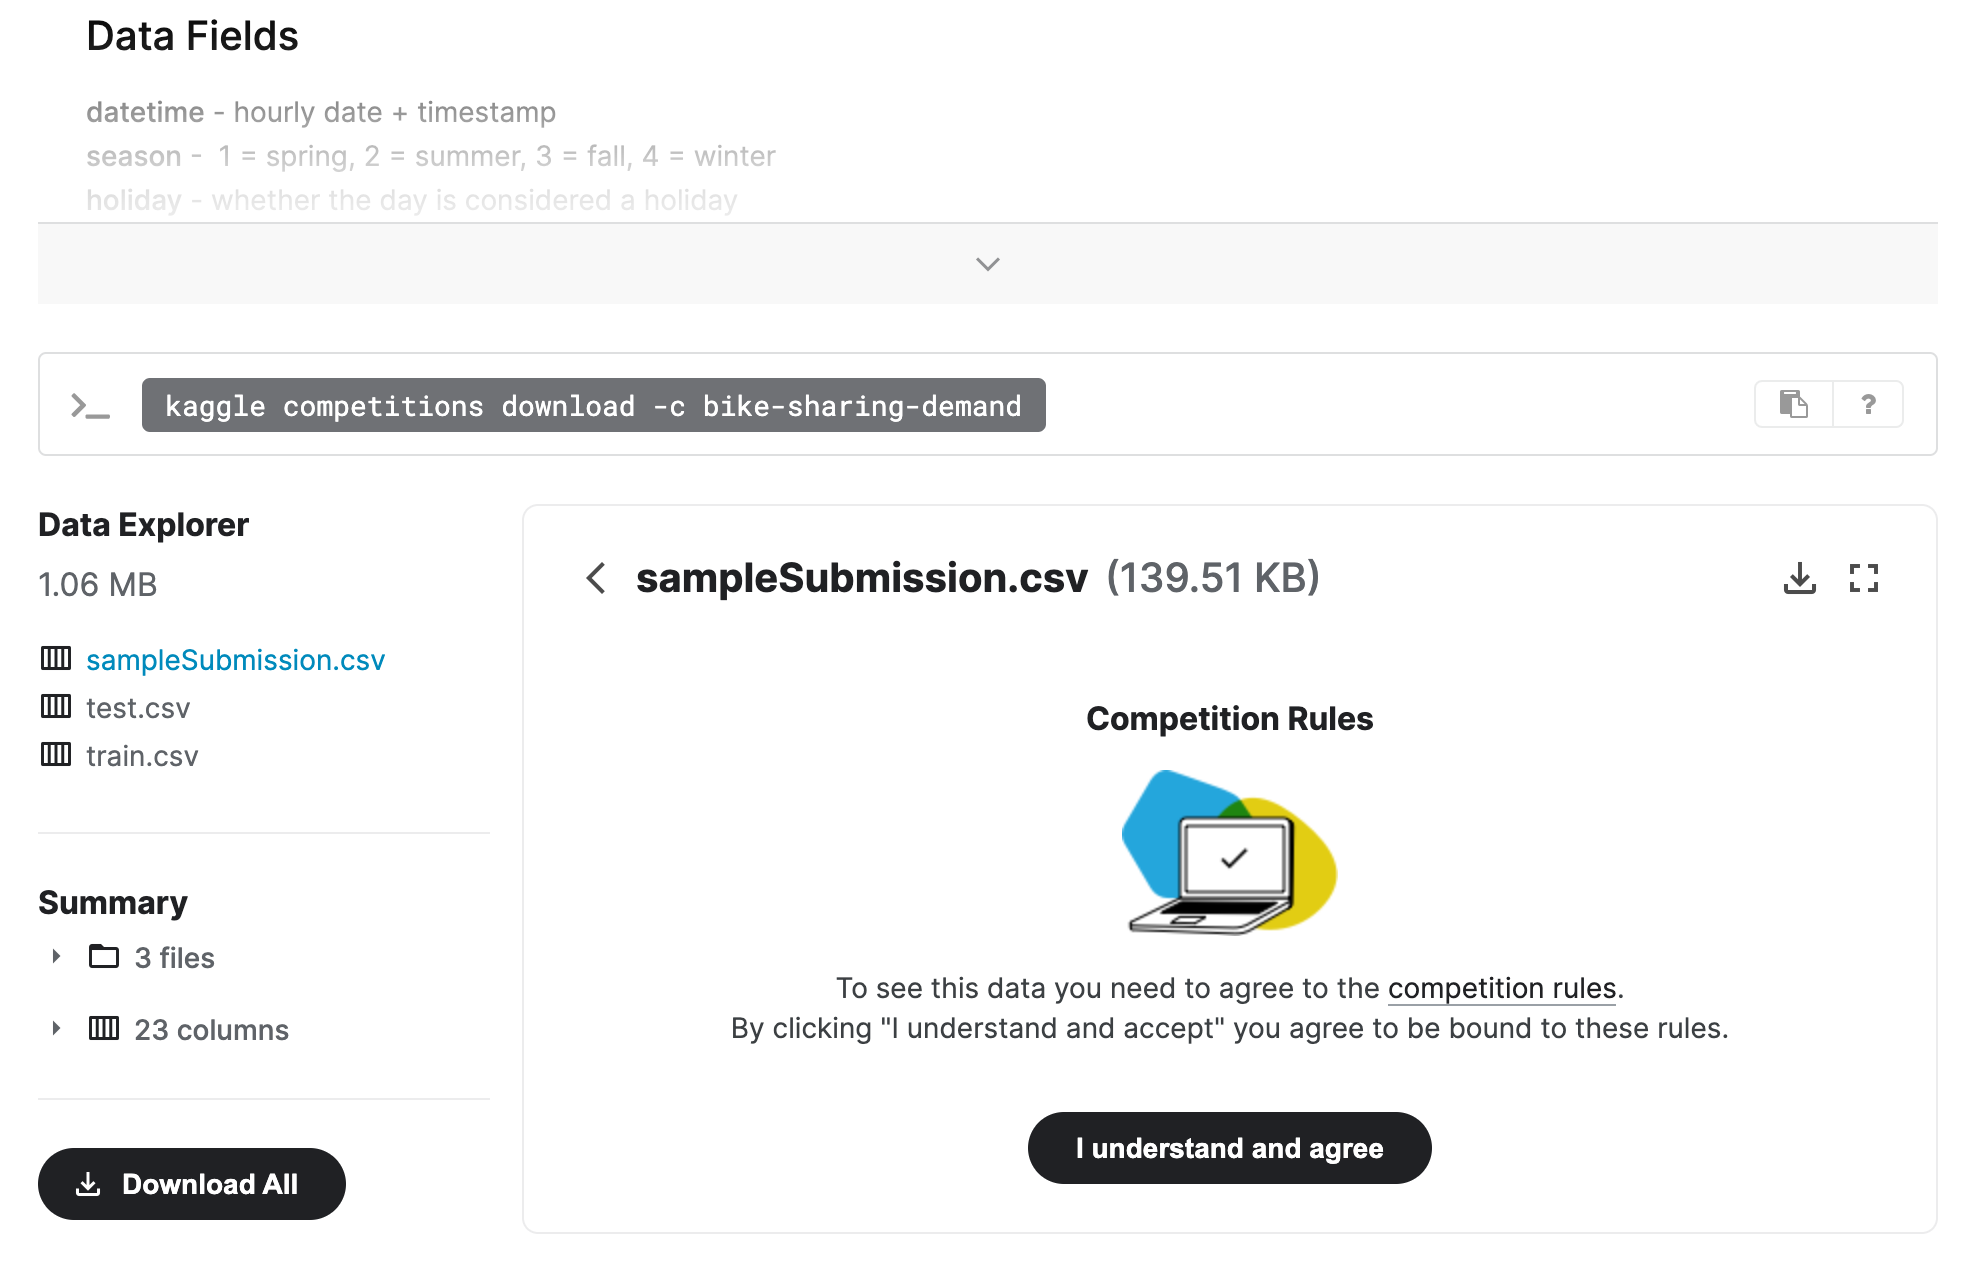

In [2]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
  Using cached bleach-6.0.0-py3-none-any.whl (162 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110699 sha256=c8851ef8d9c3c317a833bd44867b1a7c9844013a49fd690e303c66e0d09787a5
  Stored in directory: /Users/macos/Library/Caches/pip/wheels/5a/ab/50/e224f599a07faf6d398a8600796012da271b7e5e7f2a3ab2b8
Successfully built kaggle


In [8]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 2.84MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/Users/macos/miniconda3/envs/mle/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("./data/train.csv")
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("./data/test.csv")
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("./data/sampleSubmission.csv")
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [22]:
label="count"

In [26]:
predictor = TabularPredictor(label=label, eval_metric="root_mean_squared_error").fit(train.drop(["casual", "registered"], axis=1), time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230831_150916/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230831_150916/"
AutoGluon Version:  0.8.2
Python Version:     3.8.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372036.78 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_

### Review AutoGluon's training run with ranking of models that did the best.

In [27]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.063042      23.394673  527.632978                0.000920           0.307999            3       True         14
1   RandomForestMSE_BAG_L2  -53.445123      18.328172  427.222882                0.652692          33.557390            2       True         12
2          LightGBM_BAG_L2  -54.836714      18.032049  426.061724                0.356569          32.396232            2       True         11
3          CatBoost_BAG_L2  -57.409364      17.764575  426.416282                0.089095          32.750791            2       True         13
4        LightGBMXT_BAG_L2  -60.246718      22.384493  461.371356                4.709013          67.705865            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.052828    0.036819         

/opt/conda/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

In [ ]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [28]:
predictions = predictor.predict(test)
predictions.head()

0    23.040525
1    42.670486
2    46.044403
3    49.078163
4    51.002323
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [29]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.518478
std        89.834595
min         2.984583
25%        20.118204
50%        63.764725
75%       166.038818
max       368.027191
Name: count, dtype: float64

In [30]:
# How many negative values do we have?
(predictions < 0).sum().sum()

0

In [37]:
# Set them to zero
predictions[predictions < 0] = 0
predictions

0        23.040525
1        42.670486
2        46.044403
3        49.078163
4        51.002323
           ...    
6488    157.602875
6489    157.725357
6490    153.707245
6491    149.158463
6492    145.131210
Name: count, Length: 6493, dtype: float32

### Set predictions to submission dataframe, save, and submit

In [39]:
submission["count"] = predictions
submission.to_csv("submission/submission.csv", index=False)

In [40]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 340kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [41]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-08-31 15:29:03  first raw submission  complete  1.80095      1.80095       


#### Initial score of publicScore is 1.80095 and privateScore is 1.80095

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

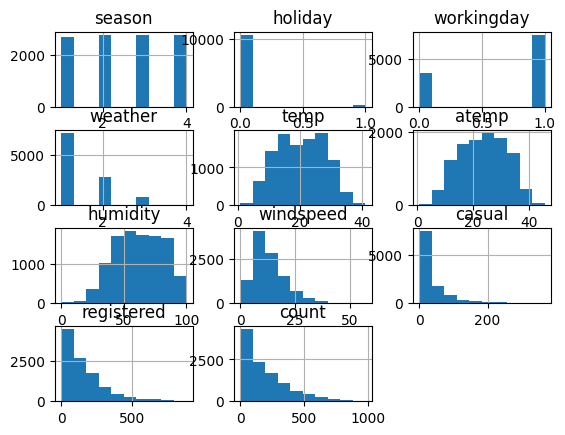

In [11]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist();

In [12]:
# create a new feature
train["ratio_atemp_temp"] = train["atemp"]/train["temp"]
train["multiple_humidity_windspeed"] = train["humidity"]*train["windspeed"]
test["ratio_atemp_temp"] = test["atemp"]/test["temp"]
test["multiple_humidity_windspeed"] = test["humidity"]*test["windspeed"]

In [13]:
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
test['month'] = pd.to_datetime(test['datetime']).dt.month
test['day'] = pd.to_datetime(test['datetime']).dt.day
test['hour'] = pd.to_datetime(test['datetime']).dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [14]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [15]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0  2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1  2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2  2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3  2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4  2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  ratio_atemp_temp  \
0        81        0.0       3          13     16          1.462907   
1        80        0.0       8          32     40          1.511641   
2        80        0.0       5          27     32          1.511641   
3        75        0.0       3          10     13          1.462907   
4        75        0.0       0           1      1          1.462907   

   multiple_humidity_windspeed  month  day  hour  
0                          0.0      1    1     0  
1                          0.0      1    1     1  
2                          0.0      1    1     2  
3                          0.0      1    1     3  
4                          0.0      1    1     4

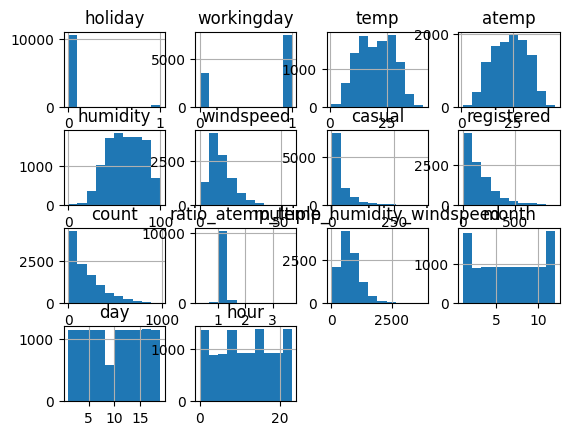

In [16]:
# View histogram of all features again now with the hour feature
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [57]:
predictor_new_features = TabularPredictor(
    label=label,
    eval_metric="root_mean_squared_error"
).fit(
    train.drop(["casual", "registered"], axis=1),
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230831_155547/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230831_155547/"
AutoGluon Version:  0.8.2
Python Version:     3.8.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:49:00 UTC 2023
Disk Space Avail:   9223372034.47 GB / 9223372036.85 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem

In [58]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.767727      25.339667  522.833709                0.001207           0.375997            3       True         14
1          LightGBM_BAG_L2  -31.125004      23.648448  431.905814                0.285531          29.021010            2       True         11
2          CatBoost_BAG_L2  -31.416216      23.560079  451.323115                0.197162          48.438311            2       True         13
3        LightGBMXT_BAG_L2  -31.466867      24.855767  444.998391                1.492850          42.113587            2       True         10
4   RandomForestMSE_BAG_L2  -32.478533      24.032978  442.715013                0.670061          39.830209            2       True         12
5      WeightedEnsemble_L2  -32.810467      22.045912  359.212734         

/opt/conda/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -111.46060438458154,
  'KNeighborsDist_BAG_L1': -89.04856113825365,
  'LightGBMXT_BAG_L1': -35.23693444455776,
  'LightGBM_BAG_L1': -34.41817964871193,
  'RandomForestMSE_BAG_L1': -38.965

<AxesSubplot:xlabel='model'>

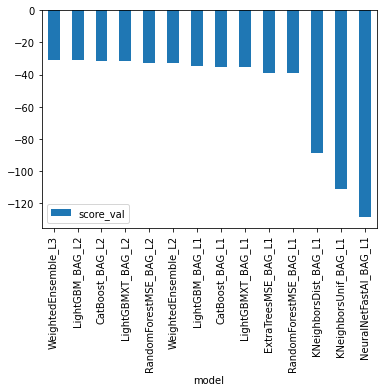

In [60]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [64]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
(predictions_new_features < 0).sum().sum()

0

In [65]:
predictions_new_features[predictions_new_features < 0] = 0

In [17]:
submission_new_features = pd.read_csv("./data/sampleSubmission.csv")

In [67]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission/submission_new_features.csv", index=False)

In [68]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 257kB/s]
Successfully submitted to Bike Sharing Demand

In [69]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-08-31 16:12:31  new features          complete  0.63184      0.63184       
submission.csv               2023-08-31 15:29:03  first raw submission  complete  1.80095      1.80095       


#### New Score of publicScore is 0.63184 and privateScore is 0.63184

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [28]:
from autogluon.common import space
# Use tutorial of Autogluon to tune hyperparameters
# Link: https://auto.gluon.ai/stable/tutorials/tabular_prediction/tabular-indepth.html
nn_options = {
    'num_epochs': 10, 
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': space.Int(lower=26, upper=66, default=36),
}

hyperparameters = {
    'GBM': gbm_options,
    'NN_TORCH': nn_options,
    }

hyperparameter_tune_kwargs = {
    "searcher": "auto",
    "scheduler": "local",
    "num_trials": 2,
}

In [29]:
predictor_new_hpo = TabularPredictor(
    label=label,
    eval_metric="root_mean_squared_error"
).fit(
    train.drop(["casual", "registered"], axis=1),
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

2023-09-01 12:40:12,709	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2023-09-01 12:40:12,711	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


2023-09-01 12:40:12,712	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
Fitted model: NeuralNetTorch_BAG_L2/05308d4e ...
	-56.9763	 = Validation score   (-root_mean_squared_error)
	26.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/0e72d83a ...
	-81.3202	 = Validation score   (-root_mean_squared_error)
	26.18s	 = Training   runtime
	0.0s	 = Validation runtime
Repeating k-fold bagging: 2/20
Fitting model: NeuralNetTorch_BAG_L2/05308d4e ... Training model for up to 190.02s of the 190.01s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with ParallelLocalFoldFittingStrategy
	-56.625	 = Validation score   (-root_mean_squared_error)
	38.56s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: NeuralNetTorch_BAG_L2/0e72d83a ... Training model for up to 173.23s of the 

In [30]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                            model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2/05308d4e -56.406429       4.696523  341.875201                1.312448          76.451551            2       True          4
1             WeightedEnsemble_L3 -56.406429       4.697520  342.067136                0.000998           0.191934            3       True          6
2  NeuralNetTorch_BAG_L1/50483d31 -66.681784       2.237896  195.164618                2.237896         195.164618            1       True          2
3             WeightedEnsemble_L2 -66.681784       2.238667  195.616794                0.000771           0.452176            2       True          3
4  NeuralNetTorch_BAG_L2/0e72d83a -80.999870       4.758002  361.523923                1.373927          96.100273            2       True          5
5  NeuralNetTorch_BAG_L1/2f9481bf -96.

/Users/macos/miniconda3/envs/mle/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch_BAG_L1/2f9481bf': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/50483d31': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetTorch_BAG_L2/05308d4e': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L2/0e72d83a': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch_BAG_L1/2f9481bf': -96.18342956074653,
  'NeuralNetTorch_BAG_L1/50483d31': -66.68178392181024,
  'WeightedEnsemble_L2': -66.68178392181024,
  'NeuralNetTorch_BAG_L2/05308d4e': -56.40642920571159,
  'NeuralNetTorch_BAG_L2/0e72d83a': -80.99987006428948,
  'WeightedEnsemble_L3': -56.40642920571159},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'NeuralNetTorch_BAG_L1/2f9481bf': 'AutogluonModels/ag-20230901_053421/models/NeuralNetTorch_BAG_L1/2f9481bf/',
  'NeuralNetTorch_BAG_L1/50483d31': 'AutogluonModels/a

<Axes: xlabel='model'>

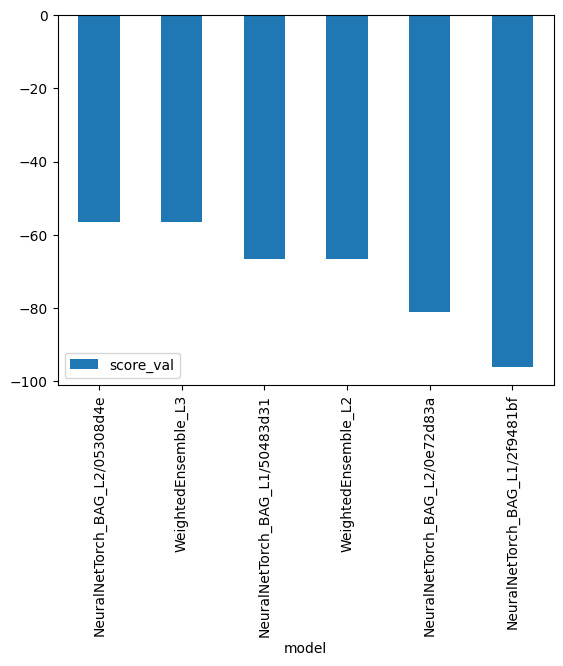

In [31]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [32]:
# Remember to set all negative values to zero
predictors_new_features_hpo = predictor_new_hpo.predict(test)
predictors_new_features_hpo[predictors_new_features_hpo < 0] = 0

In [33]:
submission_new_hpo = pd.read_csv("./data/sampleSubmission.csv")

In [34]:
# Same submitting predictions
submission_new_hpo["count"] = predictors_new_features_hpo
submission_new_hpo.to_csv("submission/submission_new_hpo.csv", index=False)

In [37]:
!kaggle competitions submit -c bike-sharing-demand -f submission/submission_new_hpo.csv -m "new features with new hyperparameters"

100%|████████████████████████████████████████| 188k/188k [00:03<00:00, 62.4kB/s]
Successfully submitted to Bike Sharing Demand

In [38]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                            status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-09-01 05:49:19  new features with new hyperparameters  complete  0.62304      0.62304       
submission_new_hpo.csv       2023-08-31 16:32:51  new features with hyperparameters      complete  0.52606      0.52606       
submission_new_features.csv  2023-08-31 16:12:31  new features                           complete  0.63184      0.63184       
submission.csv               2023-08-31 15:29:03  first raw submission                   complete  1.80095      1.80095       


#### New Score of publicScore is 0.52606 and privateScore is 0.52606

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

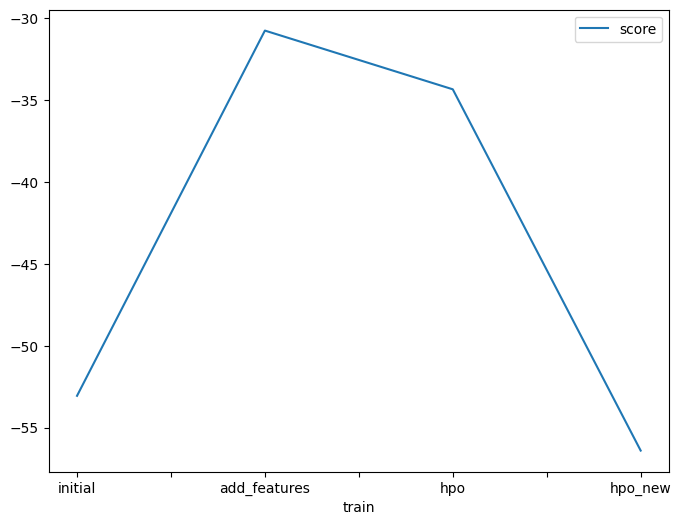

In [39]:
fig = pd.DataFrame(
    {
        "train": ["initial", "add_features", "hpo", "hpo_new"],
        "score": [-53.063042, -30.767727, -34.352909, -56.406429]
    }
).plot(x="train", y="score", figsize=(8, 6)).get_figure()
fig.savefig('images/model_train_score.png')

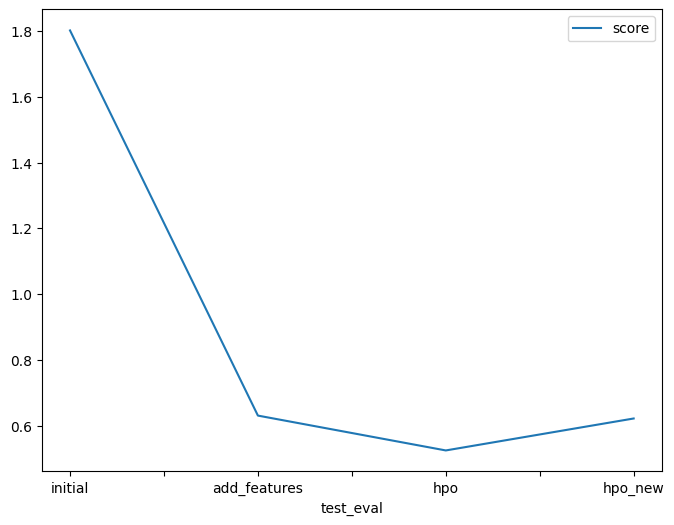

In [40]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo_new"],
        "score": [1.80095, 0.63184, 0.52606, 0.62304]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('images/model_test_score.png')

### Hyperparameter table

In [41]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo", "hpo_new"],
    "searcher": ["default", "default", "auto", "auto"],
    "scheduler": ["default", "default", "local", "local"],
    "num_trials": [0, 0, 2, 2],
    "score": [1.80095, 0.63184, 0.52606, 0.62304]
})

model searcher scheduler  num_trials    score
0       initial  default   default           0  1.80095
1  add_features  default   default           0  0.63184
2           hpo     auto     local           2  0.52606
3       hpo_new     auto     local           2  0.62304